# 911 Calls Dataset
###### Shenin Francies

Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

The original data contains the following fields:
```r
lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)
```

#### Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data

Get the current working directory:

In [2]:
os.getcwd()

'D:\\Python\\Dataset Training'

In [3]:
# See all columns
pd.options.display.max_rows = None
data = pd.read_csv(r'911.csv')
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
data.shape

(663522, 9)

#### Data Preprocessing

In [5]:
data.describe(include='all')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,663522.000000,663522.000000,663522,583323.000000,663522,663522,663229,663522,663522.0
unique,NaN,NaN,663282,NaN,148,640754,68,41292,NaN
top,NaN,NaN,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,NaN,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,5,NaN,148372,9,55490,7285,NaN
mean,40.158162,-75.300105,NaN,19236.055791,NaN,NaN,NaN,NaN,1.0
std,0.220641,1.672884,NaN,298.222637,NaN,NaN,NaN,NaN,0.0
min,0.000000,-119.698206,NaN,1104.000000,NaN,NaN,NaN,NaN,1.0
25%,40.100344,-75.392735,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.143927,-75.305143,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.229008,-75.211865,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


There are missing values, as evident from the Count. We check the total number of missing values:

In [6]:
data.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

Zip codes and Township has missing values.

We next check the datatypes of the values of each column:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


We drop the column 'e' since it is not required for our analysis:

In [8]:
data.drop('e', axis=1, inplace=True)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


Capitalize all the columns:

In [9]:
data.columns = map(str.title, data.columns)
data.head()

,Lat,Lng,Desc,Zip,Title,Timestamp,Twp,Addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


We will alternatively rename the columns for better readability:

In [10]:
data.columns = ['Latitude', 'Longitude', 'Description', 'Zip', 'Emergency', 'Timestamp', 'Township', 'Address']
data.head()

,Latitude,Longitude,Description,Zip,Emergency,Timestamp,Township,Address
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


There is a reason for emergency in the 'title' which is separated by a 'colon ":"'. Create a reason for emergency column:

In [11]:
data['ReasonEmergency'] = data['Emergency'].apply(lambda x: x.split(':')[0])
data.head()

,Latitude,Longitude,Description,Zip,Emergency,Timestamp,Township,Address,ReasonEmergency
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


Create a corresponding Cause category:

In [12]:
data['Cause'] = data['Emergency'].apply(lambda x:x.split(':')[1])
data.head()

,Latitude,Longitude,Description,Zip,Emergency,Timestamp,Township,Address,ReasonEmergency,Cause
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


Drop the Emergency column altogether:

In [13]:
data.drop('Emergency', axis=1, inplace=True)
data.head()

,Latitude,Longitude,Description,Zip,Timestamp,Township,Address,ReasonEmergency,Cause
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


We now check the Timestamp column; we need it to be in pandas Timestamp and not just a string:

In [14]:
type(data['Timestamp'].iloc[0])

str

In [15]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.head()

,Latitude,Longitude,Description,Zip,Timestamp,Township,Address,ReasonEmergency,Cause
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


In [16]:
type(data['Timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Separate the Timestamp into year, month, date and time:

In [17]:
data['Year'] = data['Timestamp'].apply(lambda x: x.year)
data.head()

,Latitude,Longitude,Description,Zip,Timestamp,Township,Address,ReasonEmergency,Cause,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015


In [18]:
data['Month'] = data['Timestamp'].apply(lambda x: x.month)
data['Day'] = data['Timestamp'].apply(lambda x: x.dayofweek)
data['Hour'] = data['Timestamp'].apply(lambda x: x.hour)
data.head()

,Latitude,Longitude,Description,Zip,Timestamp,Township,Address,ReasonEmergency,Cause,Year,Month,Day,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,3,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,3,16


In [19]:
data['Date'] = data['Timestamp'].apply(lambda x: x.date())

We drop the Timestamp column, since we have extracted all the data from it:

In [20]:
data.drop('Timestamp', axis=1, inplace=True)
data.head()

,Latitude,Longitude,Description,Zip,Township,Address,ReasonEmergency,Cause,Year,Month,Day,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,3,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,3,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,3,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,3,16,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,3,16,2015-12-10


Important notice: Day of the week on pandas range from 0 to 6, which corresponds to Monday to Sunday.

```r
0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday
```
Let us use the day specifically than the range of numbers.

Likewise, Hour corresponds to the 24-hour clock.

In [21]:
data['Day'] = data['Day'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
data.head()

,Latitude,Longitude,Description,Zip,Township,Address,ReasonEmergency,Cause,Year,Month,Day,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,Thurs,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,Thurs,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,Thurs,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,Thurs,16,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,Thurs,16,2015-12-10


Check if we have all the months:

In [22]:
data['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [23]:
data['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

Now, we tackle the Description column:

In [24]:
pd.options.display.max_rows = None
data['Description'].head()

0    REINDEER CT & DEAD END;  NEW HANOVER; Station ...
1    BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...
2    HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...
3    AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...
4    CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...
Name: Description, dtype: object

The description before the first semi-colon corresponds to the street. We extract it, in case we require it at a further point, although it is unlikely.

In [25]:
data['Street'] = data['Description'].apply(lambda x:x.split(';')[0])
data.head()

,Latitude,Longitude,Description,Zip,Township,Address,ReasonEmergency,Cause,Year,Month,Day,Hour,Date,Street
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,Thurs,17,2015-12-10,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,Thurs,17,2015-12-10,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,Thurs,14,2015-12-10,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,Thurs,16,2015-12-10,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,Thurs,16,2015-12-10,CHERRYWOOD CT & DEAD END


In [26]:
data['Street'].unique()

array(['REINDEER CT & DEAD END', 'BRIAR PATH & WHITEMARSH LN', 'HAWS AVE',
       ..., 'E VINE ST & JEFFERSON ST', 'WAS E BROA  ',
       'IVY LN & WIDENER RD'], dtype=object)

In [27]:
data['Street'].value_counts()

SHANNONDELL DR & SHANNONDELL BLVD                                        7285
MAIN ST & OLD SUMNEYTOWN PIKE                                            2576
THE FAIRWAY  & RYDAL RD                                                  1986
EAGLEVILLE RD & SUNDERLAND DR                                            1618
EVERGREEN RD & W LIGHTCAP RD                                             1591
GERMANTOWN PIKE & HANNAH AVE                                             1557
GULPH RD & KIRK AVE                                                      1440
BLACK ROCK RD & S TRAPPE RD                                              1425
DAVISVILLE RD & PENNYPACK RD                                             1367
SCHUYLKILL EXPY & WEADLEY RD OVERPASS                                    1287
DEKALB PIKE & COLONIAL DR                                                1274
SUMMIT ST & COLONIAL AVE                                                 1186
NO LOCATION - NEIGHBORING COUNTY                                

Remember that there are missing values in the Township column:

In [28]:
data['Township'].isna().sum()

293

In [29]:
data['Township'].value_counts()

LOWER MERION         55490
ABINGTON             39947
NORRISTOWN           37633
UPPER MERION         36010
CHELTENHAM           30574
POTTSTOWN            27387
UPPER MORELAND       22932
LOWER PROVIDENCE     22476
PLYMOUTH             20116
UPPER DUBLIN         18862
HORSHAM              18380
WHITEMARSH           17754
MONTGOMERY           17315
UPPER PROVIDENCE     16122
SPRINGFIELD          15504
LIMERICK             14338
EAST NORRITON        13963
WHITPAIN             13480
LANSDALE             11963
HATFIELD TOWNSHIP    11641
TOWAMENCIN           11407
WEST NORRITON        11187
LOWER GWYNEDD        11139
LOWER MORELAND       10988
LOWER POTTSGROVE     10775
FRANCONIA             9297
LOWER SALFORD         9218
UPPER GWYNEDD         8860
CHESTER COUNTY        7362
WORCESTER             6037
CONSHOHOCKEN          5655
DOUGLASS              5550
SKIPPACK              5513
HATBORO               5448
WEST CONSHOHOCKEN     5216
NEW HANOVER           5207
AMBLER                4454
J

We fill the missing towns with 'Unknown' since they could also not be found from the description:

In [30]:
data['Township'].fillna("UNKNOWN", inplace=True)
data.head()

,Latitude,Longitude,Description,Zip,Township,Address,ReasonEmergency,Cause,Year,Month,Day,Hour,Date,Street
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,Thurs,17,2015-12-10,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,Thurs,17,2015-12-10,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,Thurs,14,2015-12-10,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,Thurs,16,2015-12-10,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,Thurs,16,2015-12-10,CHERRYWOOD CT & DEAD END


In [31]:
data['Township'].value_counts()

LOWER MERION         55490
ABINGTON             39947
NORRISTOWN           37633
UPPER MERION         36010
CHELTENHAM           30574
POTTSTOWN            27387
UPPER MORELAND       22932
LOWER PROVIDENCE     22476
PLYMOUTH             20116
UPPER DUBLIN         18862
HORSHAM              18380
WHITEMARSH           17754
MONTGOMERY           17315
UPPER PROVIDENCE     16122
SPRINGFIELD          15504
LIMERICK             14338
EAST NORRITON        13963
WHITPAIN             13480
LANSDALE             11963
HATFIELD TOWNSHIP    11641
TOWAMENCIN           11407
WEST NORRITON        11187
LOWER GWYNEDD        11139
LOWER MORELAND       10988
LOWER POTTSGROVE     10775
FRANCONIA             9297
LOWER SALFORD         9218
UPPER GWYNEDD         8860
CHESTER COUNTY        7362
WORCESTER             6037
CONSHOHOCKEN          5655
DOUGLASS              5550
SKIPPACK              5513
HATBORO               5448
WEST CONSHOHOCKEN     5216
NEW HANOVER           5207
AMBLER                4454
J

We use the zip codes from the Towns that already has a zip codes and input them to fill the missing zip codes:

In [32]:
data["Zip"] = data["Zip"].fillna(data.groupby("Township")["Zip"].transform("first"))

In [33]:
data.head()

,Latitude,Longitude,Description,Zip,Township,Address,ReasonEmergency,Cause,Year,Month,Day,Hour,Date,Street
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,Thurs,17,2015-12-10,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,Thurs,17,2015-12-10,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,Thurs,14,2015-12-10,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,Thurs,16,2015-12-10,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,Thurs,16,2015-12-10,CHERRYWOOD CT & DEAD END


In [34]:
data.isna().sum()

Latitude           0
Longitude          0
Description        0
Zip                0
Township           0
Address            0
ReasonEmergency    0
Cause              0
Year               0
Month              0
Day                0
Hour               0
Date               0
Street             0
dtype: int64

#### Data analysis

Check the number of times a particular reason for emergency has been given in an Emergency call:

<AxesSubplot:xlabel='ReasonEmergency', ylabel='count'>

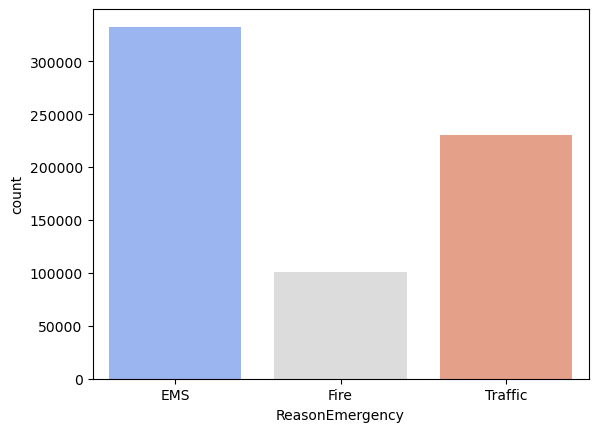

In [35]:
sns.countplot(x='ReasonEmergency', data = data, palette='coolwarm')

EMS is cited as the most frequent reason for an Emergency, followed by Traffic. Fire has been cited the least, at about 100,000 times.

Let us explore this further:

1. Is there a particular day when the Reasons has been cited the most? Does emergency occur in the weekends?
2. Is there a particular month that stands out?
3. Is there a particular period during the day that accidents tend to occur?

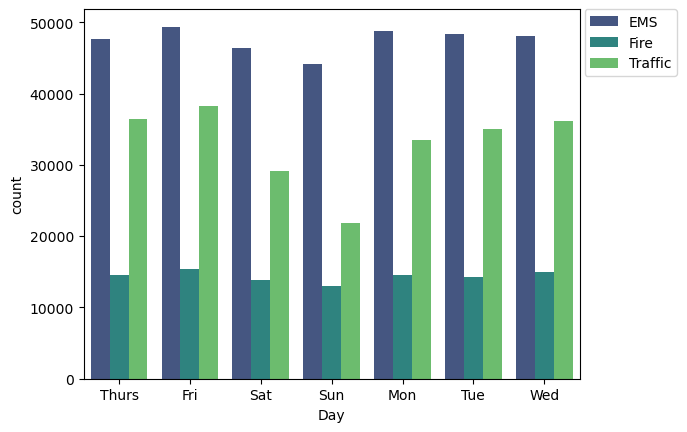

In [36]:
sns.countplot(x='Day',data=data,hue='ReasonEmergency',palette='viridis')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

The reason for emergency (and subsequently, the frequency of accidents) is more or less the same throughout the week; One could however say that it is relatively a little lower on Sunday compared to the other days of the week. It would seem that on Sundays, being days of relaxation, people do not go out as often as on the weekdays, which can be inferred by the drop in emergency calls that cited Traffic as the reason.

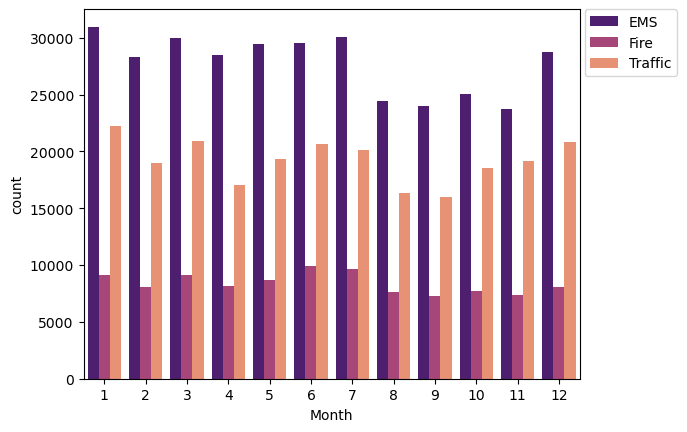

In [37]:
sns.countplot(x='Month',data=data,hue='ReasonEmergency',palette='magma')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

Looking at the above plot, one could argue that the first 6 months has recorded higher emergency calls that cites EMS as the reason as opposed to the latter 6 months. This however, do not provide us with any specific conclusion. Moving on, we see that the reasons that cited Traffic are relatively low in the 8th and 9th month, which correspond to August and September respectively. This could intuitively make sense, since one of the reason is vacation - some families may travel out of town and may not actually be in the town at all. To confirm this hypothesis, we would need additional data such as population per month, immigration/emigration per month and so on, which we do not currently have.

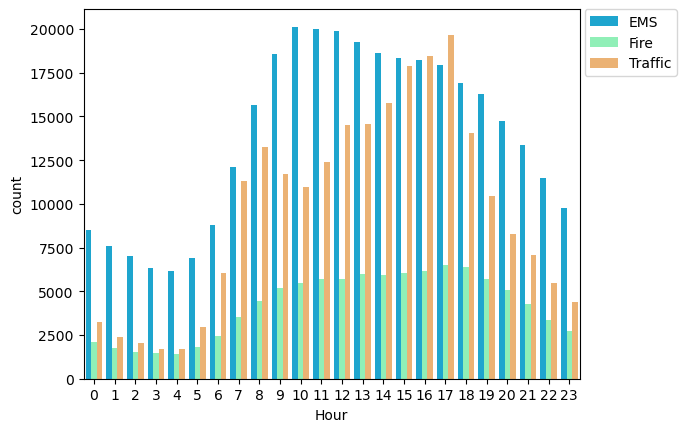

In [38]:
sns.countplot(x='Hour',data=data,hue='ReasonEmergency',palette='rainbow')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

It can be seen that the emergency calls occur the most between 9am (09:00) and 7pm (19:00). The highest occurence of accidents due to traffic can be seen at 17:00 or 5pm, which may be the rush hour when people go back home after a long day at work.

Intuitively, the least number of emergency calls occured between midnight and dawn.

We check when the timeframe when the reason of emergency as Fire has been cited the most:

Text(0, 0.5, 'Number of Emergency Calls')

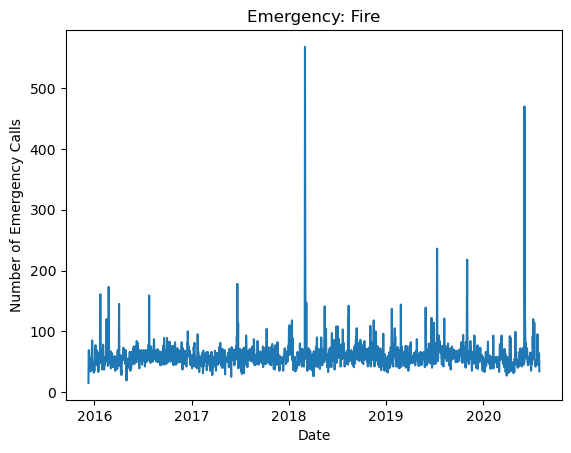

In [39]:
data.loc[data['ReasonEmergency'] == 'Fire'].groupby('Date').count()['Township'].plot()
plt.title('Emergency: Fire')
plt.ylabel('Number of Emergency Calls')

It is seen that the Fire has been cited the most in the early 2018 and late 2020. It may be worth analysing the news and other factors around this timeframe to see if there exists a specific reason for this high number of emergency calls.

Text(0, 0.5, 'Number of Emergency Calls')

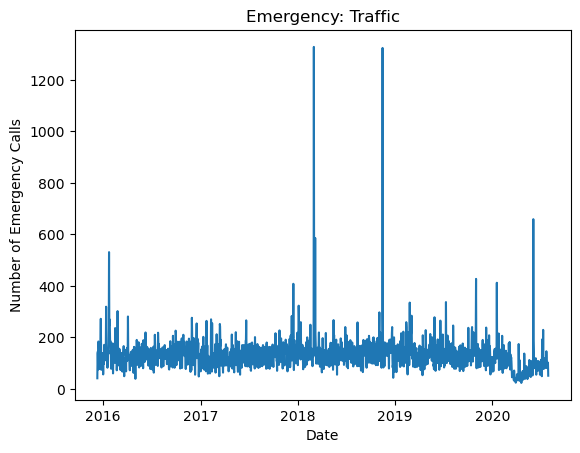

In [40]:
data.loc[data['ReasonEmergency'] == 'Traffic'].groupby('Date').count()['Township'].plot()
plt.title('Emergency: Traffic')
plt.ylabel('Number of Emergency Calls')

Analysing Traffic, it can be seen that the highest number of calls came in the early 2018 as well, but that is probably where the similarity ends between the reasons for emergency. It may therefore be worth collecting extended data to understand why there has been high number of emergeicies due to Fire and Traffic in the early 2018.

We check for correlation between the numerical data:

           Latitude  Longitude       Zip      Year     Month      Hour
Latitude   1.000000  -0.777941 -0.023470 -0.003124 -0.002175 -0.003278
Longitude -0.777941   1.000000 -0.031013  0.011832 -0.001536  0.000778
Zip       -0.023470  -0.031013  1.000000  0.003074 -0.002385 -0.001270
Year      -0.003124   0.011832  0.003074  1.000000 -0.177449 -0.001183
Month     -0.002175  -0.001536 -0.002385 -0.177449  1.000000  0.006017
Hour      -0.003278   0.000778 -0.001270 -0.001183  0.006017  1.000000


<AxesSubplot:>

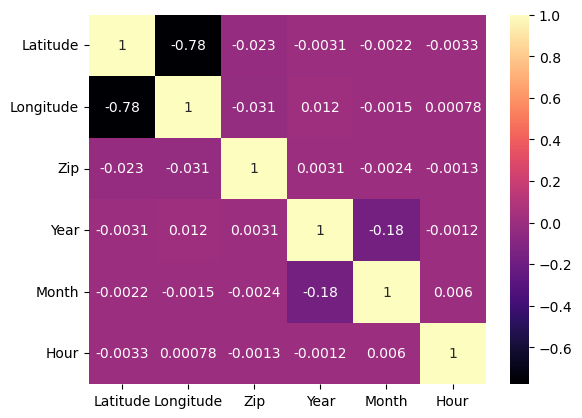

In [41]:
print(data.corr())
sns.heatmap(data.corr(),cmap='magma',annot=True)

There appear to be no correlation between any of the numerical values.